In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
d=pd.read_csv(r"C:\Users\User\Downloads\autos.csv",encoding='latin-1')
d.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [3]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

ANALYSIS 3

1) The memory usage of the data is around 6.1 mb.How can we reduce the memory usage of the data set?

In [5]:
d["price"] = d["price"].astype(np.uint32)
d["kilometer"] = d["kilometer"].astype(np.uint32)
d["powerPS"] = d["powerPS"].astype(np.uint16)
d["monthOfRegistration"] = d["monthOfRegistration"].astype(np.uint8)
d["yearOfRegistration"] = d["yearOfRegistration"].astype(np.uint16)
d["postalCode"] = d["postalCode"].astype(np.uint32)

2) What is the Average price of vehicle by fuel type and gearbox type.Give a plot

In [6]:
d2=pd.pivot_table(d,index=["fuelType","gearbox"],values=[ 'price'])
d2

price
fuelType gearbox                
andere   automatik  8.434172e+03
         manuell    1.732090e+07
benzin   automatik  1.224864e+04
         manuell    6.567121e+03
cng      automatik  6.737718e+03
         manuell    4.572039e+03
diesel   automatik  1.881035e+04
         manuell    7.326259e+03
elektro  automatik  2.290028e+04
         manuell    3.384615e+03
hybrid   automatik  1.528196e+04
         manuell    1.201370e+04
lpg      automatik  2.219599e+04
         manuell    3.255393e+03

In [7]:
ff = d.groupby(["fuelType","gearbox"])[["price"]].mean()
fff=ff.reset_index()
fff

,fuelType,gearbox,price
0,andere,automatik,8.434172e+03
1,andere,manuell,1.732090e+07
2,benzin,automatik,1.224864e+04
3,benzin,manuell,6.567121e+03
4,cng,automatik,6.737718e+03
5,cng,manuell,4.572039e+03
6,diesel,automatik,1.881035e+04
7,diesel,manuell,7.326259e+03
8,elektro,automatik,2.290028e+04
9,elektro,manuell,3.384615e+03


3) What is the Average power of a vehicle by vehicle type and gearbox type.Give a plot

In [9]:
avg_power=d.groupby(["vehicleType","gearbox"])[["powerPS"]].mean()
avg_power=avg_power.reset_index()
avg_power

,vehicleType,gearbox,powerPS
0,andere,automatik,124.922438
1,andere,manuell,100.026545
2,bus,automatik,140.884166
3,bus,manuell,110.328334
4,cabrio,automatik,188.922414
5,cabrio,manuell,133.495202
6,coupe,automatik,218.719307
7,coupe,manuell,154.581977
8,kleinwagen,automatik,75.040381
9,kleinwagen,manuell,69.628203


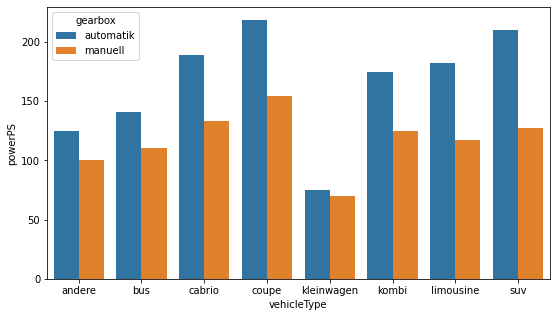

In [10]:
plt.figure(figsize=(9,5))
sns.barplot(y="powerPS",x="vehicleType",data=avg_power,hue="gearbox")
plt.show()

4) What is the Average price of a vehicle by brand as well as vehicle type.Use heatmap to explain this

In [12]:
avg_price=d.groupby(["vehicleType","brand"])[["price"]].mean().unstack()
avg_price

price                                            \
brand         alfa_romeo          audi           bmw     chevrolet   
vehicleType                                                          
andere       3153.333333  97681.198347   2686.438525  10032.803922   
bus                  NaN   3485.000000  27569.884615   6189.300000   
cabrio       9147.179487  13441.196564  38010.594552  24026.621622   
coupe        6897.190083  16341.915486  32097.647113  16317.023438   
kleinwagen   4466.242678   7358.435834   4432.658696   3029.557461   
kombi        3580.161926  17069.568857   9001.496376   4899.090090   
limousine    3067.774841  16238.554551   9613.617946   5452.099567   
suv             0.000000  24599.234542  15924.963470   9830.491228   

                                                                               \
brand           chrysler       citroen        dacia       daewoo     daihatsu   
vehicleType                                                                     
andere       8888.333333   3521.024390  4450.000000   993.800000  1075.000000   
bus          2630.515982   4409.132179  8606.700000  1262.777778  1201.500000   
cabrio       4324.531120   4536.408696          NaN   900.000000  7761.000000   
coupe        9174.240000   2695.552632          NaN   428.625000          NaN   
kleinwagen   3124.833333   3029.278894  4878.726457  1110.324627  1449.787476   
kombi        4867.845528   3724.929022  4166.642857   816.340426  3420.294118   
limousine    4173.444444  41831.889959  3359.990291   983.981308  3532.106383   
suv          5888.391304  10810.540541  9761.972093  1900.000000  2066.918367   

                          ...                                          \
brand               fiat  ...         seat         skoda        smart   
vehicleType               ...                                           
andere       3534.767568  ...  2766.378378   4706.076923  3186.666667   
bus          4014.823460  ...  7063.063830   6649.809524  1650.000000   
cabrio       6485.634286  ...          NaN   7722.500000  4673.917917   
coupe        3801.477778  ...  5551.677778   3533.000000  3851.677419   
kleinwagen   4810.258757  ...  3021.803783   4385.953737  3307.055980   
kombi        2079.487912  ...  6852.445498   7325.808473  1705.555556   
limousine    2490.146315  ...  5826.529638   5326.621622  2842.724138   
suv          8527.000000  ...  8711.750000  14389.939394          NaN   

                                                                     \
brand       sonstige_autos        subaru       suzuki        toyota   
vehicleType                                                           
andere        8.047562e+06   2616.666667  3598.571429   5477.727273   
bus           5.248337e+03   3557.764706  1767.464286   6261.194690   
cabrio        2.700394e+04   8900.000000  2309.361111   5771.323077   
coupe         1.046865e+05  10418.625000  3252.500000   5341.879032   
kleinwagen    3.821480e+05   1769.453782  3468.973631   3765.885463   
kombi         6.471289e+03   3511.162252  1583.359551   5725.737847   
limousine     1.152817e+04   7615.362637  4498.169399   4840.514477   
suv           1.427418e+04   4720.031746  6721.187251  10104.163673   

                                                        
brand             trabant     volkswagen         volvo  
vehicleType                                             
andere        2697.000000  132901.015464  13640.000000  
bus                   NaN    9237.313188           NaN  
cabrio        5799.486486    6548.038610  10665.802469  
coupe         3275.000000   14854.182493   6040.930556  
kleinwagen    2013.810345    9261.728276   3912.714286  
kombi         1569.227848    5757.728837   3583.711310  
limousine     1395.704348   10849.831331   5071.679878  
suv          14500.000000   15898.968344  15269.577465  

[8 rows x 40 columns]

<AxesSubplot:xlabel='vehicleType', ylabel='brand'>

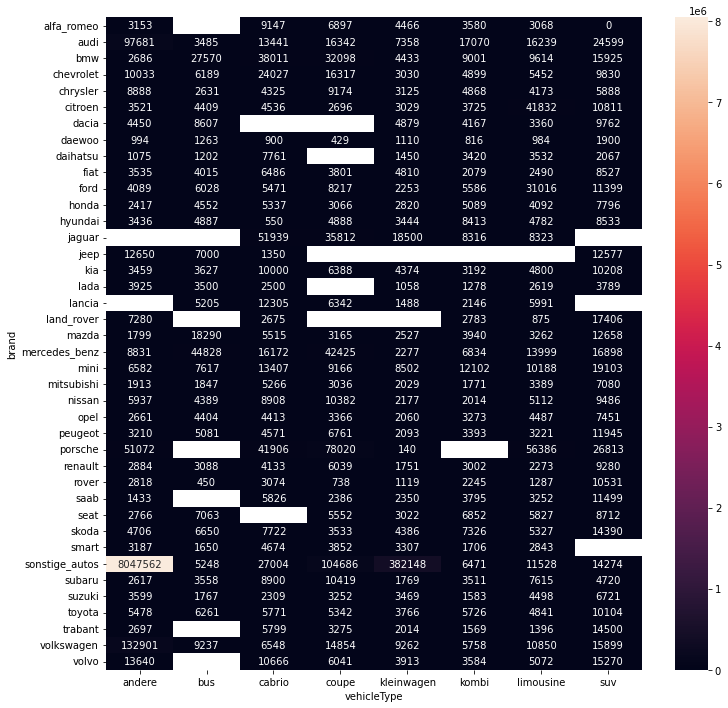

In [13]:
plt.figure(figsize=(12,12))
sns.heatmap(pd.crosstab(d["brand"],d["vehicleType"],values=d["price"],aggfunc="mean"),annot=True,fmt=".0f")